In [109]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Admission_Predict.csv')

In [110]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<Axes: >

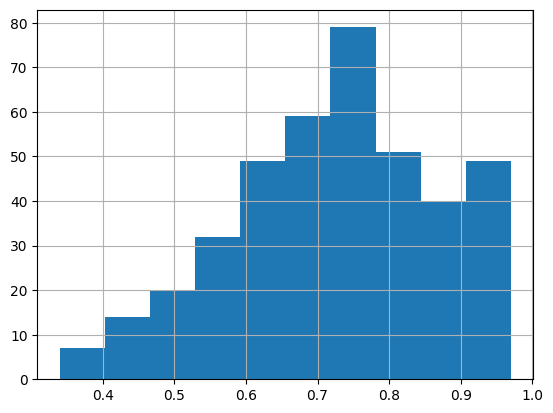

In [111]:
df['Chance of Admit '].hist()

In [112]:
df['Chance of Admit '].median()

0.73

In [113]:
df['Admit'] = df['Chance of Admit ']>0.73

In [114]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,True
396,397,325,107,3,3.0,3.5,9.11,1,0.84,True
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


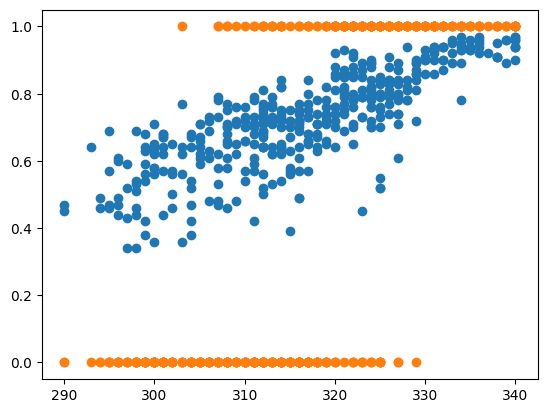

In [115]:
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.scatter(df['GRE Score'],df['Admit'])

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [117]:
X = df['GRE Score'].to_numpy()[:,np.newaxis]
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [118]:
lr = LinearRegression()
LR = LogisticRegression()

In [119]:
lr.fit(X,Y)

LinearRegression()

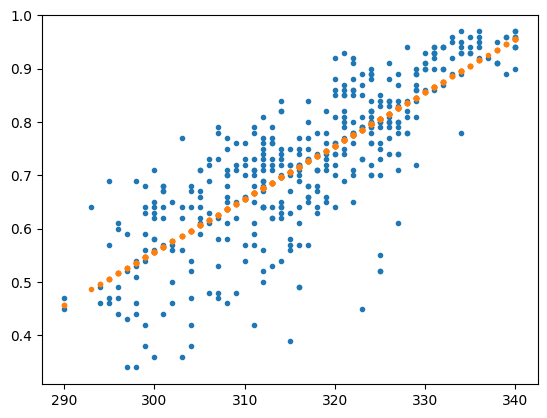

In [120]:
# This plot shows the nice linear regression fit between GRE score and Chance of admit

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')


In [121]:
#Instead of using linear regression now do logistic regression on target output classes of Admit
Y = df['Admit']
Y = Y.values

In [122]:
Y.shape

(400,)

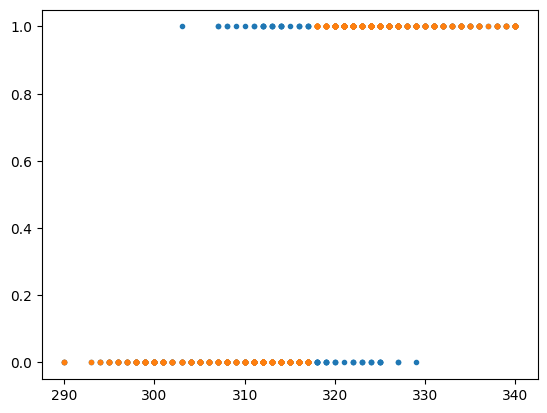

In [123]:
# this is the Logistic Regression prediction (along with ground truth)
LR.fit(X,Y)
plt.plot(X,Y,'.')
plt.plot(X,LR.predict(X),'.')

In [124]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

### Q1
``` 
A. Use 4 features from above to set up your data matrix X. These 4 features should in your opinion best predict Admit decision (4 pts)
B. Split X, Y into train, val, test (2 pts) 
C. Scale and Augment X appropriately (4 pts)```

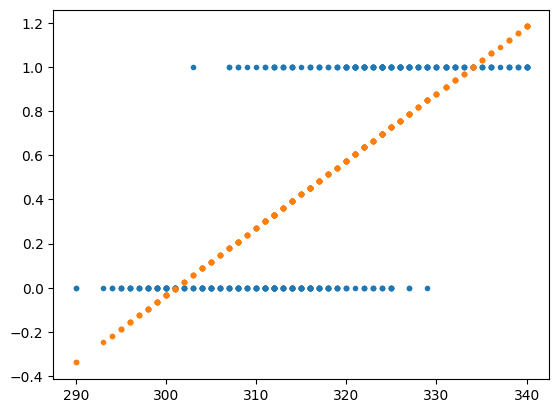

In [125]:
X1 = df['GRE Score'].to_numpy()[:,np.newaxis] # red
lr.fit(X1,Y)
plt.plot(X1,Y,'.')
plt.plot(X1,lr.predict(X1),'.')

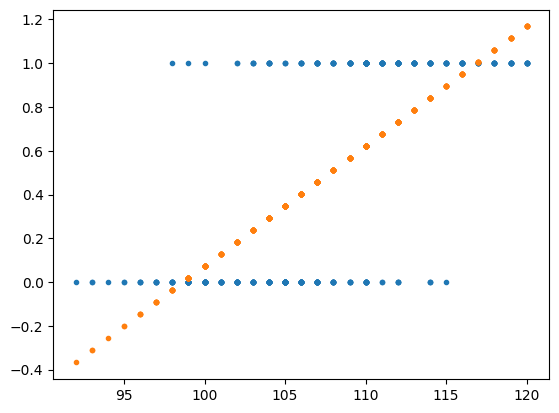

In [126]:
X2 = df['TOEFL Score'].to_numpy()[:,np.newaxis]
lr.fit(X2,Y)
plt.plot(X2,Y,'.')
plt.plot(X2,lr.predict(X2),'.')

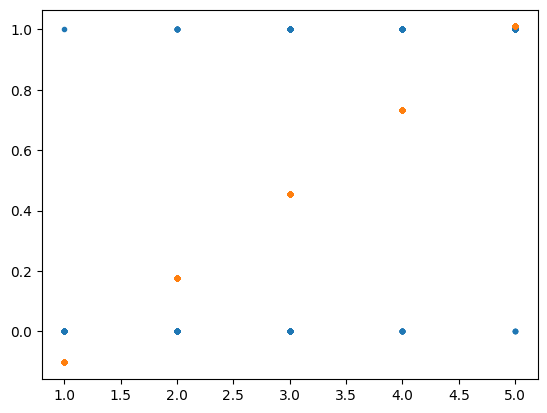

In [127]:
X3 = df['University Rating'].to_numpy()[:,np.newaxis]
lr.fit(X3,Y)
plt.plot(X3,Y,'.')
plt.plot(X3,lr.predict(X3),'.')

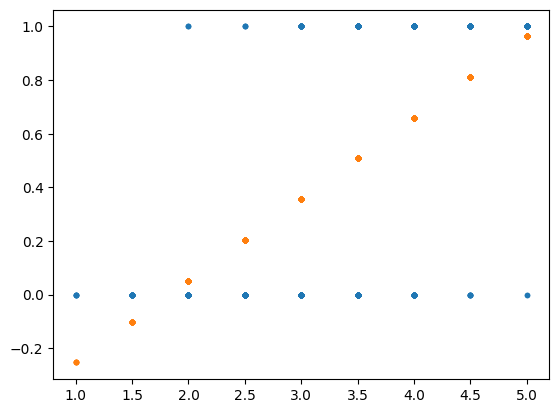

In [128]:
X4 = df['SOP'].to_numpy()[:,np.newaxis]
lr.fit(X4,Y)
plt.plot(X4,Y,'.')
plt.plot(X4,lr.predict(X4),'.')

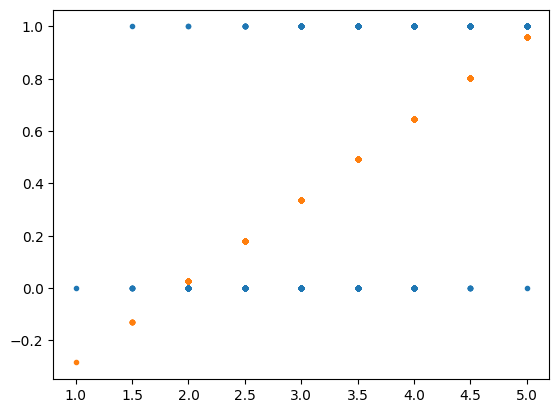

In [129]:
X5 = df['LOR '].to_numpy()[:,np.newaxis]
lr.fit(X5,Y)
plt.plot(X5,Y,'.')
plt.plot(X5,lr.predict(X5),'.')

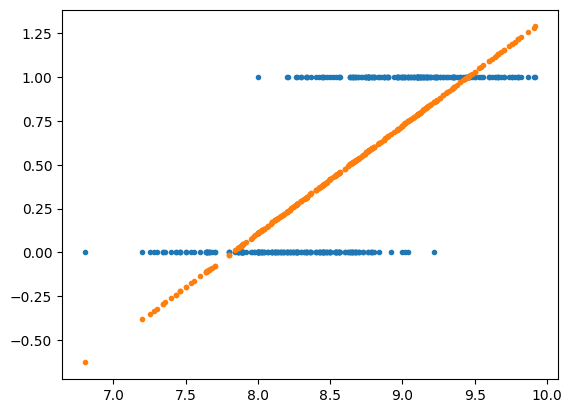

In [130]:
X6 = df['CGPA'].to_numpy()[:,np.newaxis]
lr.fit(X6,Y)
plt.plot(X6,Y,'.')
plt.plot(X6,lr.predict(X6),'.')

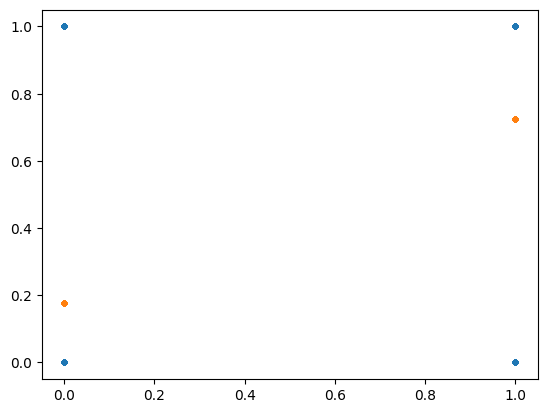

In [131]:
X7 = df['Research'].to_numpy()[:,np.newaxis]
lr.fit(X7,Y)
plt.plot(X7,Y,'.')
plt.plot(X7,lr.predict(X7),'.')

In [132]:
# 1A

X = df  # based on the above, I see that these 4 features seem to be most strongly 
        # correlated to chance of admit
X = df.filter(['GRE Score', 'TOEFL Score', 'SOP', 'CGPA'], axis = 1)

In [133]:
# 1B

def train_val_test_split(df, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    df_train = df.iloc[p[:tr], :]
    Y_train = Y[p[:tr]]
    df_val = df.iloc[p[tr+1:te], :]
    Y_val = Y[p[tr+1:te]]
    df_test = df.iloc[p[te+1:], :]
    Y_test = Y[p[te+1:]]
    return df_train, Y_train, df_val, Y_val, df_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X,Y)

In [134]:
# 1C 

from sklearn.preprocessing import StandardScaler

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_aug_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_aug_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_aug_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
# X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

LR = LogisticRegression()

LR.fit(X_aug_train, Y_train)

NameError: name 'scaler' is not defined

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def compute_cross_entropy_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((~y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

# above is corrected function
# def compute_cross_entropy_loss(X, y, theta):
#     m = len(y)
#     h = sigmoid(X @ theta)
#     epsilon = 1e-5
#     cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
#     return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))

### Q2
``` Report cross entropy loss for a random prediction of Y_val and for predictions from LR.predict(X_val) (5 pts)```

In [ ]:
# Q2 Part 1
np.random.seed(1)  # for reproducibility
n = len(Y_val)
k = np.unique(Y_val).size
random_pred = np.random.rand(n, k)
random_pred /= random_pred.sum(axis=1, keepdims=True)

onehot_Y_val = np.zeros((n, k))
onehot_Y_val[np.arange(n), np.clip(Y_val, 0, k-1)] = 1

random_ce_loss = -(onehot_Y_val * np.log(random_pred)).sum() / n
print(random_ce_loss)

In [ ]:
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [ ]:
# This is batch gradient descent that updates using all training samples
def update_weights( X, Y,  theta ) :
             
        #Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - sigmoid(np.matmul(X,theta)) )  ) / m
        cost_history = compute_cross_entropy_loss(X, Y, dtheta)  # changed from y, params
        return dtheta,cost_history

In [ ]:
# Q2 Part 2
theta = init(X_val)
dtheta, cost_h = update_weights(X_val, Y_val, theta)
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_val)
dtheta, cost_h = update_weights(X_val, y_pred, theta)
y_rand = np.random.rand(*Y_val.shape)
y_rand = y_rand >= 0.5
dtheta, cost_h = update_weights(X_val, y_rand, theta)


### Q3 
``` Implement an iterative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```
### Bonus
``` Implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  theta with dtheta, else discards dtheta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```

In [ ]:
def randomise(X_train, y_train, X_val, y_val, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        new_theta = np.random.rand(n, 1)
        new_loss = compute_cross_entropy_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

best_theta, loss_history = randomise(X_train, Y_train, X_val, Y_val, 1000)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.show()

### Q4

``` From Lab1 get the gradient descent  -- update over entire training sample, update over a  sample, update over a batch of sample -- that worked best for you. Also play with learning rate to get to the best cross_entropy_loss.  plot the cross_entropy loss history (over iterations for X_val) with this method. (20 pts)```

In [ ]:
# Run gradient descent over the entire training sample

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        dtheta = np.random.randn(n, 1)
        new_theta = theta + learning_rate * dtheta
        new_loss = compute_cross_entropy_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

learning_rate = 0.0001
max_iter = 1000
best_theta, loss_history = gradient_descent(X_train, Y_train, X_val, Y_val, learning_rate, max_iter)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.show()

$l(x_i) =  max(0,1-y_i\theta x_i)$ ```with the assumption that y_i = {+1, -1}```

``` if y_i and \theta x_i have same sign and |\theta x_i| is larger than one, loss will be zero. That is prediction matches label and prediction has magnitude greater than one there is no loss. If prediction and label have opposite sign, loss will be greater than zero -- incorrect prediction there is a loss. There is also a loss if magnitude of prediction is less than zero even if they have the same sign. Hinge loss wants correct and incorrect classification to have a margin of atleast one. ```

### Q5
``` 
Implement Hinge loss and use random search method in Q3 to reduce loss and find a better theta. plto the hinge loss history (over iterations for X_val) with this method. (10 pts)
```
### Bonus
```
Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss. plot the hinge loss history (over iterations for X_val) with this method. 
```

In [ ]:
def hinge_loss(X, y, theta):
    m = len(y)
    h = X @ theta
    loss = np.maximum(0, 1 - y * h)
    return np.mean(loss)

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        dtheta = np.random.randn(n, 1)
        new_theta = theta + learning_rate * dtheta
        new_loss = hinge_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

learning_rate = 0.01
max_iter = 100
best_theta, loss_history = gradient_descent(X_train, Y_train, X_val, Y_val, learning_rate, max_iter)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Hinge loss')
plt.show()